# Topic 6
### Eun Ju Jong 
### CIS 397
### Dr. Hallenbeck

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
def movespines():
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))

## Exercise 1 - The Newton-Raphson Method

#### Implementing the Newton-Raphson method on the function $f(x) = x^2 - 2x\ $:

In [3]:
def func(x):
    return x**2 - 2*x

Using the Centered Difference Integral;

In [4]:
def cderiv(f, x, h = 1e-2):
    return (f(x + h) - f(x - h)) / (2*h)

In [5]:
def Newton(f, x0, epsilon):
    xi = x0
    xi = xi - f(xi) / cderiv(f, xi, 1e-6)
    
    while abs(f(xi)) >= epsilon:
        xi = xi - f(xi) / cderiv(f, xi, 1e-6)
        
    return xi

In [6]:
print(Newton(func, 1.5, 1e-8))
print(Newton(func, -0.5, 1e-8))

2.0000000000000013
-1.3107200000790067e-11


$\rightarrow$ Considering the fact that it has zeroes at x = 0 and x = 2, the roots found using the Newton Raphson method are quite close to the actual root values. 

#### Finding roots of $f(x) = x\cos(x)\ $:

When $x\cos(x) = 0$, 
<br>
<br>
$\implies x = 0, \displaystyle\frac{\pi}{2}, \frac{3\pi}{2}, \frac{5\pi}{2} \frac{7\pi}{2}\dots$

- $\displaystyle\frac{\pi}{2} = 1.57079632679$
<br>
- $\displaystyle\frac{3\pi}{2} = 4.71238898038$
<br>
- $\displaystyle\frac{5\pi}{2} = 7.85398163397$
<br>
- $\displaystyle\frac{7\pi}{2} = 10.9955742876$

In [7]:
def x_cos_x(x):
    return x * np.cos(x)

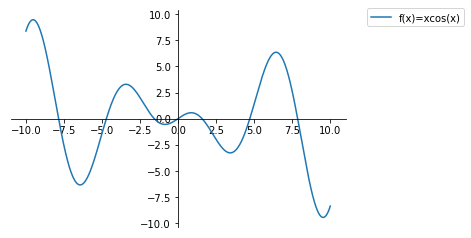

In [8]:
x = np.linspace(-10, 10, 1000)

plt.plot(x, x_cos_x(x), label = 'f(x)=xcos(x)')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.37, 1.03))
movespines()

plt.show()

In [9]:
print(Newton(x_cos_x, 0.1, 1e-8))
print(Newton(x_cos_x, 1.2, 1e-8))
print(Newton(x_cos_x, 4.5, 1e-8))
print(Newton(x_cos_x, 7.3, 1e-8))
print(Newton(x_cos_x, 10.5, 1e-8))

1.04109994605e-09
1.57079632679
4.71238898074
7.85398163397
10.9955742876


$\rightarrow$ as we can see from the results above, the roots of $xcos(x)$ calculated by the Newton Raphson method are approximately correct.

#### How far can you get from the root before Newton-Raphson fails (or finds another root)?

For $x = 0\ $: 

In [10]:
print(Newton(x_cos_x, 0.1, 1e-8))
print(Newton(x_cos_x, 0.11, 1e-8))
print(Newton(x_cos_x, -0.11, 1e-8))

1.04109994605e-09
2.47588761429e-09
-2.47588761429e-09


$\rightarrow$The Newton-Raphson method fails to calculate the root as the given x0 is 10% off by more or less from the original root value. 

For $x = \displaystyle\frac{\pi}{2}$ :

In [11]:
print(Newton(x_cos_x, 0.8, 1e-8))
print(Newton(x_cos_x, 0.989, 1e-8))
print(Newton(x_cos_x, 1.2, 1e-8))
print(Newton(x_cos_x, 2.97, 1e-8))
print(Newton(x_cos_x, 2.98, 1e-8))

-1.5707963268
1.57079632685
1.57079632679
1.5707963268
1.06896346701e-11


$\rightarrow$The Newton-Raphson method fails to calculate the root as the given x0 is 40% off by less or 90% off by more from the original root value. 

For $x = \displaystyle\frac{3\pi}{2}$ :

In [12]:
print(Newton(x_cos_x, 3.75, 1e-8))
print(Newton(x_cos_x, 3.8, 1e-8))
print(Newton(x_cos_x, 4.5, 1e-8))
print(Newton(x_cos_x, 6, 1e-8))
print(Newton(x_cos_x, 6.1, 1e-8))

-42.4115008235
4.71238898038
4.71238898074
4.71238898051
-1.57079632679


$\rightarrow$The Newton-Raphson method fails to calculate the root as the given x0 is 20% off by less or 30% off by more from the original root value.

For $x = \displaystyle\frac{5\pi}{2}$ :

In [13]:
print(Newton(x_cos_x, 6.8, 1e-8))
print(Newton(x_cos_x, 6.9, 1e-8))
print(Newton(x_cos_x, 7.3, 1e-8))
print(Newton(x_cos_x, 9.1, 1e-8))
print(Newton(x_cos_x, 9.2, 1e-8))

2948.38470539
7.85398163397
7.85398163397
7.85398163444
1.57079632679


$\rightarrow$The Newton-Raphson method fails to calculate the root as the given x0 is 13% off by less and 16% off by more from the original root value.

For $x = \displaystyle\frac{7\pi}{2}$ :

In [14]:
print(Newton(x_cos_x, 9.6, 1e-8))
print(Newton(x_cos_x, 10, 1e-8))
print(Newton(x_cos_x, 10.5, 1e-8))
print(Newton(x_cos_x, 13, 1e-8))
print(Newton(x_cos_x, 13.1, 1e-8))

23.5619449019
10.9955742876
10.9955742876
10.9955742877
14.1371669412


$\rightarrow$The Newton-Raphson method fails to calculate the root as the given x0 is 13% off by less and 18% off by more from the original root value.

#### Finding roots of $f(x) = \sqrt[3]{x}\ $:

In [15]:
def func(x):
    return np.cbrt(x)

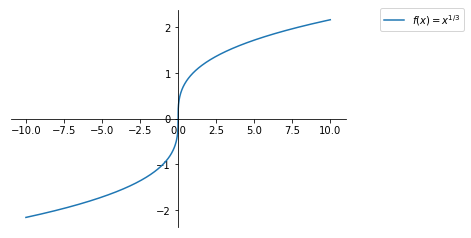

In [16]:
x = np.linspace(-10, 10, 1000)

plt.plot(x, func(x), label = '$f(x)=x^{1/3}$')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.37, 1.03))
movespines()

plt.show()

In [17]:
print(Newton(func, 0.1, 1e-8))

nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [18]:
def alt_Newton(f, x0, epsilon):
    xi = x0
    xi = xi - f(xi) / cderiv(f, xi, 1e-6)
    
    while abs(f(xi)) >= epsilon:
        xi = xi - f(xi) / cderiv(f, xi, 1e-6)
        print(xi)
        
    return xi

In [19]:
print(alt_Newton(func, 0.1, 1e-8))

0.399999999954
-0.800000000036
1.60000000017
-3.19999999936
6.40000000723
-12.8000000124
25.5999999424
-51.1999997246
102.400000099
-204.7999973
409.600004907
-819.200034651
1638.40019339
-3276.80117685
6553.61327918
-13107.2336528
26214.2783636
-52428.8137747
104855.227426
-209716.090728
419421.634311
-838766.681329
1676894.02417
-3356319.71909
6716148.15405
-13430422.9946
26777937.6801
-54193557.9819
110185823.104
-214194897.812
443669221.978
-1047168594.39
1930255933.68
-9021777954.55
inf
nan
nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


#### Where does xi tend toward?

$\rightarrow$ xi is going towards positive and negative infinity.

## Exercise 2 - The Bisection Method

Implementing the Bisection algorithm:

In [16]:
def Bisect(f, xp, xn, epsilon):
    A = f((xp + xn) / 2)
    
    while abs(A) >= epsilon:
        if A > 0:
            xp = (xp + xn) / 2 
            A = f((xp + xn) / 2)
        if A < 0: 
            xn = (xp + xn) / 2
            A = f((xp + xn) / 2)
            
    return (xp + xn) / 2

#### Finding roots of $f(x) = x\cos(x)\ $:
- $x = 0$

In [17]:
print(Bisect(x_cos_x, -.1, .1, 1e-8))

0.0


- $x = \displaystyle\frac{\pi}{2}$

In [18]:
print(Bisect(x_cos_x, 1.4, 1.7, 1e-8))

1.5707963243126866


#### Finding roots of $f(x) = \sqrt[3]{x}\ $:

In [19]:
print(Bisect(func, -0.1, 0.1, 1e-8))

0.0


## Exercise 3 - Root-Finding Speed

* These are the altered version of the Newton-Raphson function and the Bisection function to allow them to return numbers of steps the functions take to generate roots.

In [20]:
def Newton_steps(f, x0, epsilon):
    numSteps_N = 0
    xi = x0
    xi = xi - f(xi) / cderiv(f, xi, 1e-6)
    
    while abs(f(xi)) >= epsilon:
        xi = xi - f(xi) / cderiv(f, xi, 1e-6)
        numSteps_N += 1
        
    return numSteps_N

In [21]:
def Bisect_steps(f, xp, xn, epsilon):
    numSteps_B = 0
    A = f((xp + xn) / 2)
    
    while abs(A) >= epsilon:
        if A > 0:
            xp = (xp + xn) / 2 
            A = f((xp + xn) / 2)
        if A < 0: 
            xn = (xp + xn) / 2
            A = f((xp + xn) / 2)
        numSteps_B += 1
            
    return numSteps_B

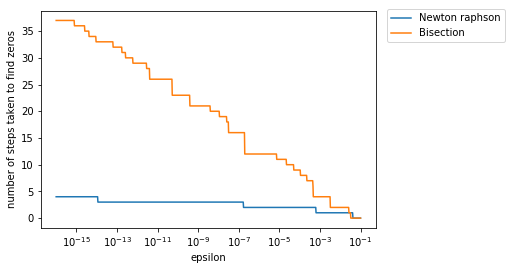

In [23]:
epsilon = 10**np.linspace(-16, -1, 1000)

steps_N = []
steps_B = []

for i in epsilon:
    steps_N.append(Newton_steps(x_cos_x, 1.4, i))
    steps_B.append(Bisect_steps(x_cos_x, 1.4, 1.7, i))

plt.semilogx(epsilon, steps_N, label = 'Newton raphson')
plt.semilogx(epsilon, steps_B, label = 'Bisection')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.40, 1.03))
plt.xlabel('epsilon')
plt.ylabel('number of steps taken to find zeros')

plt.show()

## Exercise 4 - Simple Economic Model
$S(n) = 0.02\cdot2^{\ (n - A + 2)}$
<br>
<br>
$D(n) = \displaystyle\frac{8}{\sqrt{n}}$

In [24]:
def supply(n, A):
    return 0.02*2**(n - A + 2)

In [25]:
def demand(n):
    return 8/np.sqrt(n)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


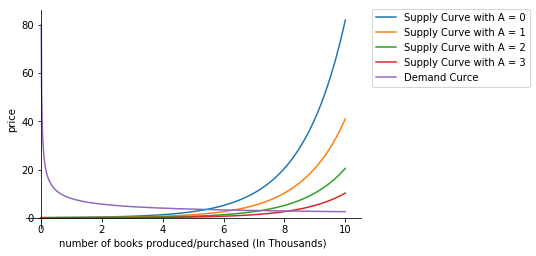

In [26]:
n = np.linspace(0, 10, 1000)

plt.plot(n, supply(n, 0), label = 'Supply Curve with A = 0')
plt.plot(n, supply(n, 1), label = 'Supply Curve with A = 1')
plt.plot(n, supply(n, 2), label = 'Supply Curve with A = 2')
plt.plot(n, supply(n, 3), label = 'Supply Curve with A = 3')
plt.plot(n, demand(n), label = 'Demand Curce')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.52, 1.03))
plt.xlabel('number of books produced/purchased (In Thousands)')
plt.ylabel('price')
movespines()

plt.show()

#### How does an increase in A mean an increased supply capacity?
$\rightarrow$ As A gets larger, the supply curve is shited outward, which indicates that the supply capacity increases as a result. This is because at the same price ranges, the numbers of books produced are greater at greater values of A.  

#### For A = 0, what is the equilibrium price per book and number of books printed?
$\rightarrow$ The equilibrium of the supply and demand curve can be found by using the root finding algorithm of the point where (point of supply) - (point of demand) = 0.

In [27]:
def alt_supply(n, p):
    return 0.02*2**(n - p + 2)

* The alt_supply curve is an alternate version of the original supply curve in order to prevent the duplication of the usage of the parameter A in both Newton-Raphson function and the supply function.

In [28]:
def equil_func(x, p = 0):
    return demand(x) - alt_supply(x, p)

In [29]:
Newton(equil_func, 0.1, 1e-8)

5.4241567538658169

In [30]:
Bisect(equil_func, 0.1, 20, 1e-8)

5.424156753392892

* The equilibrium points generated by the Newton-Raphson function and the Bisection function represent the equilibrium x value, which indicate the number of booksprinted.

$\rightarrow$ The equilibrium price per book for A = 0:

In [31]:
alt_supply(Newton(equil_func, 0.1, 1e-8), 0)

3.4349772977296436

In [32]:
demand(Newton(equil_func, 0.1, 1e-8))

3.4349772977161215

#### Plot the equilibrium price per book as production capacity increases, that is as A increases from 0 to 20:

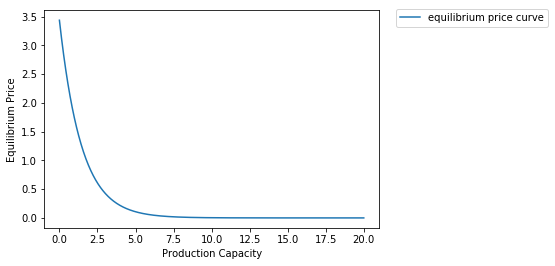

In [33]:
A = np.linspace(0, 20, 1000)

equil_prices = []

for i in A:
    equil_prices.append(alt_supply(Newton(equil_func, 0.1, 1e-8), i))

plt.plot(A, equil_prices, label = 'equilibrium price curve')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.52, 1.03))
plt.xlabel('Production Capacity')
plt.ylabel('Equilibrium Price')

plt.show()